In [10]:
import os
import time
import math
import pandas as pd
import numpy as np
import sqlalchemy
import sys
print(pd.__version__)

pd.set_option('max_columns', None)

#from postgressql import *

1.3.4


In [11]:
conn_params_dic = {
    "host": "10.0.0.102",
    "dbname": "mastr",
    "user": "uba_user",
    "password": "UBAit2021!",
    "port": "5432"
}

sqlpath = "./sqlCommands/loadMastrDBfiles.sql"

def format_bytes(size):
    # 2**10 = 1024
    power = 2**10
    n = 0
    power_labels = {0 : '', 1: 'kilo', 2: 'mega', 3: 'giga', 4: 'tera'}
    while size > power:
        size /= power
        n += 1
    return size, power_labels[n]+'bytes'

def build_postgres_conn_string (param:dict) -> str:
    return f'postgresql+psycopg2://{param["user"]}:{param["password"]}@{param["host"]}:{param["port"]}/{param["dbname"]}'

def create_postgres_engine (param:dict):
    conString = build_postgres_conn_string(param)
    engine = sqlalchemy.create_engine(conString, pool_recycle=3600)
    return engine

def read_postgres_from_queryfile (sqlpath:str, postgresLogin:dict):# -> pandas.DataFrame:
    engine = create_postgres_engine(postgresLogin)
    
    scriptFile = open(sqlpath,'r')
    script = scriptFile.read()
    df = pd.read_sql(script, engine)

    return df

# Read from MaStR Postgres DB

In [12]:
sqlpath = "./sqlCommands/loadMastrDBfiles.sql"
df = read_postgres_from_queryfile(sqlpath, conn_params_dic)
#df = df.dropna()
df['SpezifischeLeistung'] = (df.Nettonennleistung * 1000) / ((math.pi * df.Rotordurchmesser**2) / 4)
df.head(n=10)#.filter(regex="grad(?i)").head()
#df.to_excel()

,EinheitMastrNummer,DatumLetzteAktualisierung,LokationMaStRNummer,NetzbetreiberpruefungStatus,NetzbetreiberpruefungDatum,AnlagenbetreiberMastrNummer,Land,Bundesland,Landkreis,Gemeinde,Gemeindeschluessel,Postleitzahl,Gemarkung,FlurFlurstuecknummern,StrasseNichtGefunden,Hausnummer_nv,HausnummerNichtGefunden,Ort,Laengengrad,Breitengrad,Registrierungsdatum,Inbetriebnahmedatum,EinheitSystemstatus,EinheitBetriebsstatus,NichtVorhandenInMigriertenEinheiten,DatumDesBetreiberwechsels,DatumRegistrierungDesBetreiberwechsels,NameStromerzeugungseinheit,Weic_nv,Kraftwerksnummer_nv,Energietraeger,Bruttoleistung,Nettonennleistung,AnschlussAnHoechstOderHochSpannung,FernsteuerbarkeitNb,FernsteuerbarkeitDv,FernsteuerbarkeitDr,Einspeisungsart,GenMastrNummer,Lage,Hersteller,Technologie,Typenbezeichnung,Nabenhoehe,Rotordurchmesser,Rotorblattenteisungssystem,AuflageAbschaltungLeistungsbegrenzung,EegMaStRNummer,AuflagenAbschaltungSchallimmissionsschutzNachts,AuflagenAbschaltungSchallimmissionsschutzTagsueber,AuflagenAbschaltungSchattenwurf,AuflagenAbschaltungTierschutz,AuflagenAbschaltungEiswurf,AuflagenAbschaltungSonstige,Weic,WeicDisplayName,Seelage,ClusterNordsee,Wassertiefe,Kuestenentfernung,GeplantesInbetriebnahmedatum,Strasse,Hausnummer,Adresszusatz,DatumEndgueltigeStilllegung,ClusterOstsee,DatumBeginnVoruebergehendeStilllegung,Kraftwerksnummer,DatumWiederaufnahmeBetrieb,SpezifischeLeistung
0,SEE900002935310,2021-10-19 10:28:04.490695,SEL957516775208,1,2021-10-27,ABR935787334270,84,1400.0,Oder-Spree,Jacobsdorf,12067237.0,15236.0,Pillgram,03:106,0.0,0.0,0.0,Jacobsdorf,14.387865,52.351393,2021-08-20,2021-07-15,472,35,0,2020-03-30,2020-05-04,WEA 3,0,0,2497,4500.00,4500.00,1.0,0.0,1.0,0.0,688.0,SGE970229452754,888,1627.0,691,N149/4.0-4.5NH164,164.00,149.1,1.0,1.0,EEG949357649497,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,None,NaT,257.731408
1,SEE900004001082,2021-01-27 20:20:59.429862,SEL949397946808,1,2021-01-27,ABR967616635029,84,1409.0,Paderborn,Büren,5774016.0,33154.0,Salzkotten,Flur 2 und Flurstück 192,0.0,0.0,0.0,Salzkotten,8.651723,51.699230,2019-07-11,2011-03-10,472,35,0,NaT,NaT,BroWi SalzkottenII,1,0,2497,2000.00,2000.00,0.0,1.0,1.0,0.0,688.0,SGE953172981724,888,1586.0,691,E-82,108.38,82.0,NaN,0.0,EEG905689504088,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,None,NaT,378.714915
2,SEE900011187731,2020-01-08 18:07:22.967045,SEL901928237038,1,2020-01-10,ABR962772458710,84,1410.0,Eifelkreis Bitburg-Prüm,Hütten,7232056.0,54673.0,Hütten,1 89/1,0.0,0.0,0.0,Hütten,6.248464,50.018301,2020-01-08,2002-12-20,472,35,0,NaT,NaT,Hütten-Wind Heide,1,0,2497,600.00,600.00,0.0,1.0,0.0,1.0,688.0,None,888,1586.0,691,E40 6.44,78.00,44.0,0.0,0.0,EEG940019359143,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,None,NaT,394.599032
3,SEE900013535608,2021-01-21 15:14:32.282210,SEL956642007177,1,2020-10-29,ABR955714105537,84,1410.0,Donnersbergkreis,Gauersheim,7333022.0,67294.0,Gauersheim,"900/1, 901",0.0,0.0,0.0,Gauersheim,8.045690,49.651650,2019-02-14,2013-12-27,472,35,0,NaT,NaT,V202217,0,0,2497,3075.00,3075.00,1.0,1.0,1.0,1.0,688.0,SGE938072733246,888,1660.0,691,Vestas V112,140.00,112.0,NaN,1.0,EEG998437166812,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,None,NaT,312.118272
4,SEE900014803461,2021-11-15 14:18:58.767802,SEL977165118843,0,2021-11-15,ABR918453648000,84,1415.0,Erfurt,Erfurt,16051000.0,99095.0,None,None,NaN,NaN,NaN,Erfurt,NaN,NaN,2021-03-25,2021-03-25,472,37,0,NaT,NaT,Kleinwindrad,0,0,2497,2.02,2.02,NaN,0.0,NaN,NaN,689.0,None,888,2554.0,692,Tesup Atlas2.0,NaN,1.2,0.0,0.0,EEG918287727568,NaN,NaN,NaN,NaN,NaN,NaN,None,None,NaN,NaN,NaN,NaN,NaT,None,None,None,NaT,NaN,NaT,None,NaT,1786.072139
5,SEE900018842459,2019-06-06 07:29:04.554597,SEL957663731027,1,2019-06-06,ABR974422971418,84,1413.0,Nordsachsen,Wiedemar,14730340.0,4509.0,Zaasch,Flur 4 Flurstück 6/1,0.0,0.0,0.0,Wiedemar,12.286509,51.558769,2019-06-06,1999-12-22,472,3

In [13]:
print(f"Size: {format_bytes(sys.getsizeof(df))}")
print(f"Size: {format_bytes(df.memory_usage(index=True, deep=True).sum())}")

df.isna().sum()#.count()

Size: (43.61191749572754, 'megabytes')
Size: (43.61190223693848, 'megabytes')


EinheitMastrNummer                           0
DatumLetzteAktualisierung                    0
LokationMaStRNummer                       2057
NetzbetreiberpruefungStatus                  0
NetzbetreiberpruefungDatum                1706
                                         ...  
ClusterOstsee                            32559
DatumBeginnVoruebergehendeStilllegung    32752
Kraftwerksnummer                         32790
DatumWiederaufnahmeBetrieb               32787
SpezifischeLeistung                        398
Length: 70, dtype: int64

In [7]:
len(df.columns)

70

# Filter Offshore Wind

In [14]:
# Filter Wind Mastr data for only offshore data by using the Wassertiefe column
offshore = df.dropna(subset=["Wassertiefe"])
# add a counter column
offshore.loc[:,("Anlagenzahl")] = 1
# exclude outliers
offshore_ostsee = offshore.dropna(subset=["ClusterOstsee"])
offshore_ostsee = offshore_ostsee.loc[offshore_ostsee.Laengengrad > 2.5]
offshore_nordsee = offshore.dropna(subset=["ClusterNordsee"])
# combine filtered ost and nordsee data
offshore = pd.concat([offshore_nordsee, offshore_ostsee])

/opt/anaconda/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value


In [19]:
import geopandas as gpd

# Convert pandas df to geopandas with Längen and Breitengrad to coordinates
offshore_geo = gpd.GeoDataFrame(
    offshore, 
    geometry=gpd.points_from_xy(offshore.Laengengrad, offshore.Breitengrad))

# Import shp files for parks
offshore_parks = gpd.read_file("/home/eouser/Documents/code/Windatlas/windatlas/mastr/geoData/contis_offshorewindfarms.shp", encoding = 'unicode_escape', engine ='python')
offshore_parks = offshore_parks.rename(columns={"name_": "Windparkname"})
# set crs of points to the one of parks
offshore_geo = offshore_geo.set_crs(offshore_parks.crs)
offshore_geo.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [20]:
# combine shapes of same name
offshore_parks_diss = offshore_parks.dissolve(by='Windparkname', aggfunc='first', as_index=False)

# set crs for calculations in meter
offshore_parks_diss = offshore_parks_diss.to_crs(epsg=3763)
# recalculate area and boundary
offshore_parks_diss["Fläche qkm"] = (offshore_parks_diss.geometry.area / 1000000).round(2)
offshore_parks_diss["Umfang km"] = (offshore_parks_diss.geometry.boundary.length / 1000).round(2)
# buffer boundary to catch wea on the edge of shapes
offshore_parks_diss["geometry"] = offshore_parks_diss.geometry.buffer(15)
# reset crs
offshore_parks_diss = offshore_parks_diss.to_crs(epsg=4326)

offshore_parks_diss.head()

,Windparkname,geometry,featureid,featurespe,status,featuretyp,uuid,Fläche qkm,Umfang km,Sea,E-Charts,ROP site
0,ARCADIS Ost 1,"POLYGON ((13.61152 54.81953, 13.61152 54.81953...",404963,PilotPhase,Approved,Offshore_Windfarms,fcc7affe-9505-4a9a-9d0d-ffd3db0578a6,26.32,27.53,Baltic Sea,None,EO 4
1,Albatros,"POLYGON ((6.24822 54.46604, 6.24820 54.46603, ...",191913,PilotPhase,inUse,Offshore_Windfarms,d21f299b-07d8-4fcb-8055-1049344631b6,10.76,15.12,North Sea,Ja,EN 08
2,Amrumbank West,"POLYGON ((7.64078 54.53883, 7.64078 54.53884, ...",129323,PilotPhase,inUse,Offshore_Windfarms,897101b9-296c-4ba0-8790-1c2cee90c8d3,30.96,25.33,North Sea,Ja,EN 04
3,Arkona-Becken Südost,"POLYGON ((14.06067 54.79429, 14.06068 54.79430...",129273,PilotPhase,inUse,Offshore_Windfarms,a857ed8f-d39b-4f21-b626-b3c9b8d5f8f7,39.12,23.94,Baltic Sea,Ja,EO 1
4,BARD Offshore 1,"POLYGON ((6.01806 54.42216, 6.01808 54.42216, ...",129443,PilotPhase,inUse,Offshore_Windfarms,6c2966c1-8434-4a6e-ac90-eb8652addcc5,57.96,34.09,North Sea,None,EN 06


In [21]:
# inner spatial Join for points with Parks to add park information to points
offshore_geo_parks = offshore_geo.sjoin(offshore_parks_diss, how="left", predicate='within')
offshore_geo_parks_grouped = pd.DataFrame(offshore_geo_parks.drop(columns='geometry'))

# correcting Leistung
offshore_geo_parks_grouped["Nettonennleistung"] = offshore_geo_parks_grouped["Nettonennleistung"] / 1000
offshore_geo_parks_grouped["Bruttoleistung"] = offshore_geo_parks_grouped["Bruttoleistung"] / 1000

# set Nordsee or Ostsee
offshore_geo_parks_grouped[["ClusterNordsee","ClusterOstsee"]] = offshore_geo_parks_grouped[["ClusterNordsee","ClusterOstsee"]].notnull().astype(int)

# Groupby Windparkname
offshore_geo_parks_grouped = offshore_geo_parks_grouped.groupby("Windparkname").agg({
    "ClusterNordsee":["mean"],
    "ClusterOstsee":["mean"],
    "Anlagenzahl":["sum"],
    "Nettonennleistung":["sum"],
    "Bruttoleistung":["sum"],
    "SpezifischeLeistung":["mean"],
    "Nabenhoehe":["mean"],
    "Rotordurchmesser":["mean"],
    "Typenbezeichnung": lambda x:x.value_counts().index[0]
})

offshore_geo_parks_grouped.round(1)


,ClusterNordsee,ClusterOstsee,Anlagenzahl,Nettonennleistung,Bruttoleistung,SpezifischeLeistung,Nabenhoehe,Rotordurchmesser,Typenbezeichnung
,mean,mean,sum,sum,sum,mean,mean,mean,<lambda>
Windparkname,,,,,,,,,
Albatros,1.0,0.0,16,117.6,117.6,394.6,105.0,154.0,SWT 7.0 154
Amrumbank West,1.0,0.0,79,298.6,298.6,336.1,90.0,119.7,SWT-3.6-120
Arkona-Becken Südost,0.0,1.0,59,371.7,371.7,338.2,102.0,154.0,Siemens 6.0-154 PB-HWRT
BARD Offshore 1,1.0,0.0,80,400.0,400.0,427.7,90.0,122.0,BARD 5.0
Borkum Riffgrund 1,1.0,0.0,78,312.0,312.0,353.7,87.0,120.0,SWT-3.6-120 V3
Borkum Riffgrund 2,1.0,0.0,56,464.8,464.8,392.9,112.2,164.0,MHI Vestas Offshore Wind V164-8.0
Butendiek,1.0,0.0,80,288.0,288.0,318.3,91.0,120.0,SWT-3.6-120
DanTysk,1.0,0.0,78,294.8,294.8,334.2,88.0,120.0,SWT-3.6-120


/tmp/ipykernel_21556/4280700852.py:6: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.any(level=1) should use df.groupby(level=1).any()
  filtered_gdf = world[world.name.str.contains("|".join(country_filter)).any(level=0)]


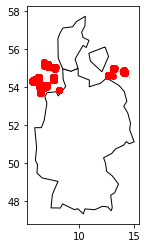

In [22]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.head()

# We restrict to the countrys in the following list.
country_filter = ["Germany","Denmark"]
filtered_gdf = world[world.name.str.contains("|".join(country_filter)).any(level=0)]
ax = filtered_gdf.plot(
    color='white', edgecolor='black',figsize=(20, 4))

# We can now plot our ``GeoDataFrame``.
offshore_parks.plot(ax=ax, color='blue')
offshore_geo.plot(ax=ax, color='red',figsize=(12, 4))

plt.show()

In [23]:
import folium

x = offshore_geo.geometry.iloc[0].x
y = offshore_geo.geometry.iloc[0].y

map = folium.Map(location = [y,x], tiles='OpenStreetMap' , zoom_start = 7)

for _, r in offshore_parks.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    geo_j = folium.GeoJson(data=geo_j,
                           style_function=lambda x: {'fillColor': 'orange'})
    folium.Popup(r['Windparkname']).add_to(geo_j)
    geo_j.add_to(map)

for _, r in offshore_geo.iterrows():
    # Without simplifying the representation of each borough,
    # the map might not be displayed
    sim_geo = gpd.GeoSeries(r['geometry']).simplify(tolerance=0.0001)
    geo_j = sim_geo.to_json()
    folium.CircleMarker(location=[r['geometry'].x, r['geometry'].y], radius=2, weight=0).add_to(map)
            #folium.GeoJson(data=geo_j,
            #            tyle_function=lambda x: {'marker': 'o'})
    #folium.Popup(r['Nettonennleistung']).add_to(geo_j)
    #geo_j.add_to(map)

map

# PLOTTING SPACIAL DATA

In [1]:

import matplotlib.pyplot as plt
import plotly.express as px
import math

In [5]:
px.colors.named_colorscales()

['aggrnyl',
 'agsunset',
 'blackbody',
 'bluered',
 'blues',
 'blugrn',
 'bluyl',
 'brwnyl',
 'bugn',
 'bupu',
 'burg',
 'burgyl',
 'cividis',
 'darkmint',
 'electric',
 'emrld',
 'gnbu',
 'greens',
 'greys',
 'hot',
 'inferno',
 'jet',
 'magenta',
 'magma',
 'mint',
 'orrd',
 'oranges',
 'oryel',
 'peach',
 'pinkyl',
 'plasma',
 'plotly3',
 'pubu',
 'pubugn',
 'purd',
 'purp',
 'purples',
 'purpor',
 'rainbow',
 'rdbu',
 'rdpu',
 'redor',
 'reds',
 'sunset',
 'sunsetdark',
 'teal',
 'tealgrn',
 'turbo',
 'viridis',
 'ylgn',
 'ylgnbu',
 'ylorbr',
 'ylorrd',
 'algae',
 'amp',
 'deep',
 'dense',
 'gray',
 'haline',
 'ice',
 'matter',
 'solar',
 'speed',
 'tempo',
 'thermal',
 'turbid',
 'armyrose',
 'brbg',
 'earth',
 'fall',
 'geyser',
 'prgn',
 'piyg',
 'picnic',
 'portland',
 'puor',
 'rdgy',
 'rdylbu',
 'rdylgn',
 'spectral',
 'tealrose',
 'temps',
 'tropic',
 'balance',
 'curl',
 'delta',
 'oxy',
 'edge',
 'hsv',
 'icefire',
 'phase',
 'twilight',
 'mrybm',
 'mygbm']

In [27]:
start = '2021-10-15'
end = '2022-08-15'

test = df[(df["Inbetriebnahmedatum"] >= start) & (df["Inbetriebnahmedatum"] < end) & (df["Nettonennleistung"] < 6000)]

fig = px.scatter_mapbox(offshore_geo_parks, 
            lat='Breitengrad', 
            lon='Laengengrad', 
            #animation_frame = 'Inbetriebnahmedatum',
            color="Nettonennleistung", #"SpezifischeLeistung",
            #size="Nettonennleistung",
            hover_name="EegMaStRNummer", 
            hover_data=["Windparkname","Inbetriebnahmedatum","Hersteller",'Typenbezeichnung', "Nettonennleistung"],
            #color_discrete_sequence=px.colors.sequential.Rainbow, #px.colors.qualitative.Antique,
            color_continuous_scale="jet", 
            zoom=6,
            height=600,
            mapbox_style="open-street-map")

fig.show()